In [50]:
%matplotlib inline

import requests
import numpy as np 
import json 
import pandas as pd
import matplotlib.pyplot as plt


# API call MSFT, AAPL,AMZN

In [6]:
#convert the request to a json object
MSFT = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=539COEUG1C1IYXMF")
MSFT = MSFT.json()
AMZN = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&outputsize=full&apikey=539COEUG1C1IYXMF")
AMZN = AMZN.json()
AAPL = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=539COEUG1C1IYXMF")
AAPL = AAPL.json()
print (AAPL)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'AAPL', '3. Last Refreshed': '2019-08-16', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2019-08-16': {'1. open': '204.2800', '2. high': '207.1600', '3. low': '203.8400', '4. close': '206.5000', '5. adjusted close': '206.5000', '6. volume': '28805721', '7. dividend amount': '0.0000', '8. split coefficient': '1.0000'}, '2019-08-15': {'1. open': '203.4600', '2. high': '205.1400', '3. low': '199.6700', '4. close': '201.7400', '5. adjusted close': '201.7400', '6. volume': '27227400', '7. dividend amount': '0.0000', '8. split coefficient': '1.0000'}, '2019-08-14': {'1. open': '203.1600', '2. high': '206.4400', '3. low': '202.5900', '4. close': '202.7500', '5. adjusted close': '202.7500', '6. volume': '36547400', '7. dividend amount': '0.0000', '8. split coefficient': '1.0000'}, '2019-08-13': {'1. open': '201.0200', '2. high': '212.1400', '3. low': '200.

# JSON TO DataFrame

In [7]:
#access the 
MSFT_df= pd.DataFrame(MSFT['Time Series (Daily)'])
MSFT_df = MSFT_df.T
AMZN_df = pd.DataFrame(AMZN['Time Series (Daily)'])
AMZN_df = AMZN_df.T
AAPL_df = pd.DataFrame(AAPL['Time Series (Daily)'])
AAPL_df = AAPL_df.T





# WRITE TO CSVFILE

In [11]:
# AAPL_df.Date = pd.to_datetime(AAPL_df.Date, format ="%Y-%m-%d")
# MSFT_df.Date = pd.to_datetime(MSFT_df.Date, format ="%Y-%m-%d")
# AMZN_df.Date = pd.to_datetime(AMZN_df.Date, format ="%y-%m-%d")



MSFT_df.index.name ="Date"
AMZN_df.index.name = "Date"
AAPL_df.index.name = "Date"

export_MSFT= MSFT_df.to_csv(r'MSFT.csv')
export_AMZN = AMZN_df.to_csv(r'AMZN.csv') 
export_AAPL = AAPL_df.to_csv(r'AAPL.csv')


AttributeError: 'DataFrame' object has no attribute 'Date'

In [24]:
AAPL = requests.get("https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2010-1-1&endDate=2016-1-1&token=109f5370ae0b4daebb5cfe8dd36f68f13fc1281f")
                   


In [26]:
AAPL = AAPL.json()

In [45]:
dict_ = dict()

list_ = ['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 
         'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']
for i in list_:
    dict_[i]=list()



for day in AAPL:
#     print("\n")
    temp_list = day.keys()
    
    for key in temp_list:
        list_obj = dict_[key]
        list_obj.append(day[key])
        
        
    
    
 

In [46]:
df = pd.DataFrame.from_dict(dict_)

In [47]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2010-01-04T00:00:00.000Z,214.01,214.50,212.38,213.43,17633200,26.677465,26.738547,26.474277,26.605165,123432523,0.0,1.0
1,2010-01-05T00:00:00.000Z,214.38,215.59,213.25,214.60,21496600,26.723588,26.874421,26.582727,26.751012,150476350,0.0,1.0
2,2010-01-06T00:00:00.000Z,210.97,215.23,210.75,214.38,19720000,26.298514,26.829545,26.271089,26.723588,138040138,0.0,1.0
3,2010-01-07T00:00:00.000Z,210.58,212.00,209.05,211.75,17040400,26.249898,26.426908,26.059176,26.395745,119282919,0.0,1.0
4,2010-01-08T00:00:00.000Z,211.98,212.00,209.06,210.30,15986100,26.424415,26.426908,26.060422,26.214995,111902811,0.0,1.0


In [48]:
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")


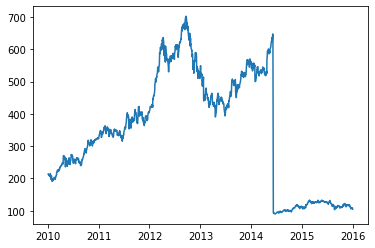

In [53]:
plt.plot(df.date,df.close)